# CREATION DES BOUNDINGS BOX

In [62]:
import pandas as pd
import numpy as np

In [10]:
ports_file_path = "../../ports.csv"
wpi_file_path = "../../wpi.csv"
ports_rad3000_res10_file_path="../../ports_rad3000_res10.csv"
dim_ports_file_path = "../../dim_port.csv"

In [253]:
ports_file=pd.read_csv(ports_file_path, delimiter=';')
wpi_file=pd.read_csv(wpi_file_path, delimiter=';')
ports_rad3000_res10=pd.read_csv(ports_rad3000_res10_file_path, delimiter=';')
dim_ports_file=pd.read_csv(dim_ports_file_path, delimiter=';')


# GROUPER LES PORTS PAR PROXIMITÉ

In [297]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
from sklearn.neighbors import BallTree

# Charger les données
ports_df = pd.read_csv("../../dim_port.csv", delimiter=';')

# Convertir en GeoDataFrame en utilisant les coordonnées géographiques
geometry =  [Point(xy) for xy in zip(ports_df['longitude'], ports_df['latitude'])]
ports_gdf = gpd.GeoDataFrame(ports_df, geometry=geometry)

# Construire un arbre de recherche spatiale pour les ports
tree = BallTree(ports_gdf[['longitude', 'latitude']].values, leaf_size=15)

# Fonction pour trouver les ports voisins d'un port donné dans une distance maximale
def trouver_ports_voisins(ports_gdf, port_index, distance_max):
    neighbors = tree.query_radius([ports_gdf.iloc[port_index][['longitude', 'latitude']].values], r=distance_max)
    return ports_gdf.iloc[neighbors[0]].index.tolist()

# Définir la distance maximale pour la recherche de proximité
distance_max = 0.09  # Modifier cette valeur selon vos besoins

# Rassembler les ports par proximité
groupes_ports = []
ports_traites = set()

for index, port in ports_gdf.iterrows():
    if index not in ports_traites:
        ports_voisins = trouver_ports_voisins(ports_gdf, index, distance_max)
        groupes_ports.append(ports_voisins)
        ports_traites.update(ports_voisins)

# Afficher les groupes de ports par proximité
#for i, groupe in enumerate(groupes_ports, start=1):
#    print(f"Groupe {i}: {groupe}")
groupes_ports_proximite=[groupe for groupe in groupes_ports if len(groupe)>1]

In [298]:
# Créer un dictionnaire pour suivre les indices des sous-listes contenant chaque valeur
indices_valeurs = {}

# Parcourir chaque sous-liste dans la liste d'origine
for i, sous_liste in enumerate(groupes_ports_proximite):
    # Parcourir chaque valeur dans la sous-liste
    for valeur in sous_liste:
        # Si la valeur est déjà dans le dictionnaire
        if valeur in indices_valeurs:
            # Fusionner la sous-liste actuelle avec la sous-liste déjà présente
            groupes_ports_proximite[indices_valeurs[valeur]] += sous_liste
            # Supprimer la sous-liste actuelle
            groupes_ports_proximite[i] = []
            # Sortir de la boucle interne
            break
        else:
            # Ajouter l'index de la sous-liste actuelle pour cette valeur dans le dictionnaire
            indices_valeurs[valeur] = i

# Filtrer les sous-listes vides (résultat de la fusion)
groupes_ports_proximite = [sous_liste for sous_liste in groupes_ports_proximite if sous_liste]
# Éliminer les doublons de chaque sous-liste
for sous_liste in groupes_ports_proximite:
    sous_liste[:] = list(set(sous_liste))
# Afficher la liste de listes résultante
groupes_ports_proximite

[[26, 29],
 [27, 31],
 [37, 38, 4179, 4147, 4148, 4180],
 [41, 42],
 [56, 53],
 [57, 62],
 [88, 85, 86, 87],
 [98, 125],
 [170, 101],
 [201, 107, 195],
 [185, 110],
 [171, 117],
 [123, 156],
 [129, 166],
 [145, 131],
 [164, 132, 133],
 [154, 149],
 [208, 162],
 [198, 174],
 [362, 235, 236],
 [237, 238, 239],
 [3337, 3332, 246, 3334],
 [256, 249, 252, 253],
 [264, 262],
 [309, 348, 276],
 [281, 303],
 [288, 300],
 [321, 292],
 [304, 293],
 [344, 294],
 [335, 311],
 [328, 340],
 [352, 353],
 [369, 371],
 [560, 513, 378, 455],
 [651, 381],
 [598, 383],
 [384, 447],
 [386, 635],
 [514, 587, 646, 391],
 [392, 469],
 [619, 572, 397, 607],
 [401, 642],
 [413, 534],
 [520, 414],
 [418, 523],
 [441, 437],
 [451, 479],
 [608, 465, 622],
 [664, 482],
 [488, 653, 486],
 [553, 492, 566],
 [496, 515],
 [558, 503],
 [531, 5308, 508],
 [563, 511],
 [573, 527],
 [533, 590],
 [541, 549],
 [5537, 5690, 543],
 [547, 548],
 [554, 631],
 [586, 555, 661],
 [557, 606],
 [5400, 570],
 [616, 5618, 5356],
 [666,

In [299]:
ports_gdf1=ports_gdf.copy()

ports_gdf1['presence_groupe_ports'] = False
ports_gdf1['Groupe n°'] = np.NaN

# Parcourir les indices de votre DataFrame et vérifier leur présence dans les sous-listes
for i, group in enumerate(groupes_ports_proximite):
    for indice in group:
        if indice in ports_gdf1.index:
            ports_gdf1.loc[indice, 'presence_groupe_ports'] = True#f"L'indice {indice} est présent dans la sous-liste {i}. "
            ports_gdf1.loc[indice, 'Groupe n°'] = i
        else :
            print(indice)

# Afficher le DataFrame
#ports_gdf1

In [300]:
groupes = ports_gdf1.groupby(ports_gdf1['Groupe n°'])

# Affichez le nombre d'éléments dans chaque groupe
for nom_groupe, groupe in groupes:
    print(f"Groupe {nom_groupe}: {len(groupe)} éléments")

Groupe 0.0: 2 éléments
Groupe 1.0: 2 éléments
Groupe 2.0: 6 éléments
Groupe 3.0: 2 éléments
Groupe 4.0: 2 éléments
Groupe 5.0: 2 éléments
Groupe 6.0: 4 éléments
Groupe 7.0: 2 éléments
Groupe 8.0: 2 éléments
Groupe 9.0: 3 éléments
Groupe 10.0: 2 éléments
Groupe 11.0: 2 éléments
Groupe 12.0: 2 éléments
Groupe 13.0: 2 éléments
Groupe 14.0: 2 éléments
Groupe 15.0: 3 éléments
Groupe 16.0: 2 éléments
Groupe 17.0: 2 éléments
Groupe 18.0: 2 éléments
Groupe 19.0: 3 éléments
Groupe 20.0: 3 éléments
Groupe 21.0: 4 éléments
Groupe 22.0: 4 éléments
Groupe 23.0: 2 éléments
Groupe 24.0: 3 éléments
Groupe 25.0: 2 éléments
Groupe 26.0: 2 éléments
Groupe 27.0: 2 éléments
Groupe 28.0: 2 éléments
Groupe 29.0: 2 éléments
Groupe 30.0: 2 éléments
Groupe 31.0: 2 éléments
Groupe 32.0: 2 éléments
Groupe 33.0: 2 éléments
Groupe 34.0: 4 éléments
Groupe 35.0: 2 éléments
Groupe 36.0: 2 éléments
Groupe 37.0: 2 éléments
Groupe 38.0: 2 éléments
Groupe 39.0: 4 éléments
Groupe 40.0: 2 éléments
Groupe 41.0: 4 éléments
Gr

In [371]:
groupes_uniques = ports_gdf1['Groupe n°']#.unique()

# Créer un GeoDataFrame vide pour stocker les boîtes englobantes de chaque groupe
bounding_boxes = gpd.GeoDataFrame(columns=['geometry'])
bounding_boxes_list = []

#ports_gdf1 = ports_gdf1.dropna(subset=['Groupe n°'])

# Parcourir chaque groupe unique
for groupe in groupes_uniques:
    # Sélectionner les points pour ce groupe
    if not np.isnan(groupe) :
        points_groupe = ports_gdf1[ports_gdf1['Groupe n°'] == groupe]
        
        # Calculer les coordonnées de la boîte englobante
        minx, miny, maxx, maxy = points_groupe.bounds.minx.min(), points_groupe.bounds.miny.min(), \
                                  points_groupe.bounds.maxx.max(), points_groupe.bounds.maxy.max()
    
        # Créer un polygone rectangulaire à partir des coordonnées de la boîte englobante
        bounding_box = Polygon([(minx, miny), (maxx, miny), (maxx, maxy), (minx, maxy)])
    
        bounding_box_gdf = gpd.GeoDataFrame({ 'bounding_box': [bounding_box]}, crs=ports_gdf1.crs)
    
        # Ajouter la boîte englobante au GeoDataFrame
        bounding_boxes_list.append(bounding_box_gdf)
        
        bounding_boxes = pd.concat(bounding_boxes_list, ignore_index=True)
    else :
        bounding_box=Polygon()

        bounding_box_gdf = gpd.GeoDataFrame({ 'bounding_box': [bounding_box]}, crs=ports_gdf1.crs) #'Groupe n°' :'Port isolé'
    
        # Ajouter la boîte englobante au GeoDataFrame
        bounding_boxes_list.append(bounding_box_gdf)
        
        bounding_boxes = pd.concat(bounding_boxes_list, ignore_index=True)
#    bounding_boxes = pd.concat([gpd.GeoDataFrame([bbox], geometry='geometry') for bbox in bounding_boxes], ignore_index=True)

# # Afficher les points et les boîtes englobantes
# fig = plt.figure(figsize=(10, 10))
# ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

# ports_gdf.plot(ax=ax, color='red', markersize=50)
# bounding_boxes.boundary.plot(ax=ax, color='blue', linewidth=2)

# # Définir les limites de la carte
# margin = 0.5  # Marge autour des boîtes englobantes
# minx, miny, maxx, maxy = bounding_boxes.total_bounds
# #ax.set_xlim(minx - margin, maxx + margin)
# #ax.set_ylim(miny - margin, maxy + margin)
# ax.add_feature(cfeature.COASTLINE)
# ax.add_feature(cfeature.BORDERS)

# ax.set_xlim(minx - margin, maxx + margin)
# ax.set_ylim(miny - margin, maxy + margin)
# # Afficher la carte
# plt.xlabel('Longitude')
# plt.ylabel('Latitude')
# plt.title('Boîtes englobantes autour des points par groupe')
# plt.grid(True)
# plt.show()



In [327]:
# Sauvegarder le DataFrame au format CSV
bounding_boxes.to_csv('Bounding_boxes.csv', index=False)

In [362]:
bounding_boxes.set_index('Groupe n°', inplace=True)

In [372]:
Concat=pd.concat([ports_gdf1, bounding_boxes], axis=1)
Concat.to_csv('BOUNDING_BOXES.csv', index=False)

In [389]:
Concat.rename(columns={'bounding_box': 'geometry_bounding_box'}, inplace=True)

In [393]:
import geopandas as gpd
from shapely import wkt

# Convertir la colonne 'geometry_bounding_box' en objets géométriques Shapely

#Concat['geometry_buffer'] = Concat['geometry_buffer'].apply(wkt.loads)

# Créer un GeoDataFrame à partir du DataFrame 'data' en utilisant la colonne 'geometry_bounding_box'
Concat_gdf = gpd.GeoDataFrame(Concat, geometry='geometry_bounding_box')

# Afficher le GeoDataFrame

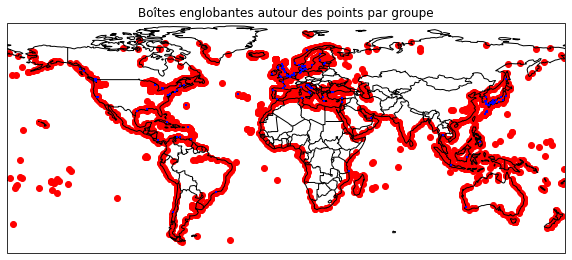

In [403]:
# Afficher les points et les boîtes englobantes
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

ports_gdf.plot(ax=ax, color='red')
Concat_gdf.boundary.plot(ax=ax, color='blue', linewidth=2)
# Définir les limites de la carte
margin = 0.5  # Marge autour des boîtes englobantes
# minx, miny, maxx, maxy = bounding_boxes.total_bounds
#ax.set_xlim(minx - margin, maxx + margin)
#ax.set_ylim(miny - margin, maxy + margin)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)

# Afficher la carte
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Boîtes englobantes autour des points par groupe')
plt.grid(True)
plt.show()

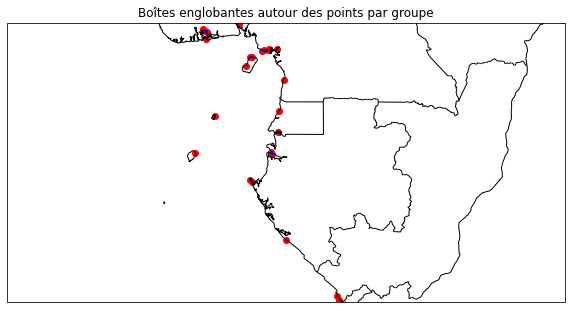

In [397]:
# Afficher les points et les boîtes englobantes
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

ports_gdf.plot(ax=ax, color='red')
Concat_gdf.boundary.plot(ax=ax, color='blue', linewidth=2)
# Définir les limites de la carte
margin = 0.5  # Marge autour des boîtes englobantes
# minx, miny, maxx, maxy = bounding_boxes.total_bounds
#ax.set_xlim(minx - margin, maxx + margin)
#ax.set_ylim(miny - margin, maxy + margin)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)

ax.set_xlim(0, 20)
ax.set_ylim(-5,5)
# Afficher la carte
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Boîtes englobantes autour des points par groupe')
plt.grid(True)
plt.show()

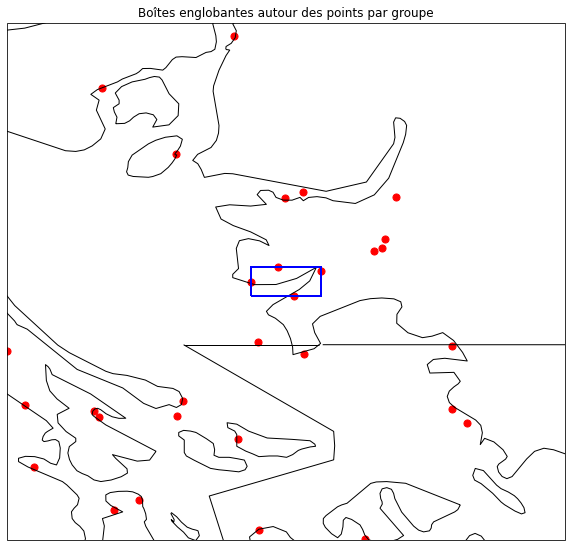

In [402]:
# Afficher les points et les boîtes englobantes
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

ports_gdf.plot(ax=ax, color='red', markersize=50)

filtered_gdf = Concat_gdf[Concat_gdf['Groupe n°'] == 34]


filtered_gdf.boundary.plot(ax=ax, color='blue', linewidth=2)

# Définir les limites de la carte
margin = 0.5  # Marge autour des boîtes englobantes
minx, miny, maxx, maxy = filtered_gdf.total_bounds
ax.set_xlim(minx - margin, maxx + margin)
ax.set_ylim(miny - margin, maxy + margin)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)


# Afficher la carte
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Boîtes englobantes autour des points par groupe')
plt.grid(True)
plt.show()